<a href="https://colab.research.google.com/github/37stu37/GNS_GAN/blob/master/ctgan_Casualties.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**import**
---



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# **Generative adverserial network**

![GAN process](https://github.com/37stu37/GNS_GAN/blob/master/ctganProcess.png?raw=1)

In [2]:
# import pandas as pd
from pathlib import Path
import pandas as pd

In [3]:
outputDir = Path('/content/drive/My Drive/Colab Notebooks/02_Output')

In [4]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/00_Exploratory/Casualty_Nick/cas_data.csv')

ID – self describing

eth – discrete categories

age – continuous in categories

sex – discrete categories

scene – discrete categories

event – discrete categories

AS – discrete categories

Itype – discrete categories

Ipart – discrete categories

Casstate – continuous categories

Mmi – continuous value

Cascode - discrete categories

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16323 entries, 0 to 16322
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     16323 non-null  int64  
 1   id        16323 non-null  int64  
 2   eth       16323 non-null  int64  
 3   age       16323 non-null  int64  
 4   sex       16322 non-null  float64
 5   scene     16323 non-null  int64  
 6   event     16323 non-null  object 
 7   AS        16323 non-null  int64  
 8   itype     16322 non-null  float64
 9   ipart     16321 non-null  float64
 10  casstate  16322 non-null  float64
 11  mmi       16323 non-null  float64
 12  cascode   16323 non-null  int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 1.6+ MB


In [ ]:
import seaborn as sns
g = sns.pairplot(data)

In [36]:
trainingSample = data.sample(n=1000)
discrete_columns = ['eth', 'age','sex', 'scene', 'event', 
                    'AS', 'Itype', 'Ipart', 'casstate','Cascode']

In [37]:
trainingSample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 12834 to 13449
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1000 non-null   int64  
 1   id        1000 non-null   int64  
 2   eth       1000 non-null   int64  
 3   age       1000 non-null   int64  
 4   sex       1000 non-null   float64
 5   scene     1000 non-null   int64  
 6   event     1000 non-null   object 
 7   AS        1000 non-null   int64  
 8   itype     1000 non-null   float64
 9   ipart     1000 non-null   float64
 10  casstate  1000 non-null   float64
 11  mmi       1000 non-null   float64
 12  cascode   1000 non-null   int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 109.4+ KB


#**Data pre-processing**



![CTGAN process](https://github.com/37stu37/GNS_GAN/blob/master/ctganOverview.png?raw=1)

In [9]:
data.reset_index(inplace=True)
data.drop(['index', 'scenario', 'pid'], axis=1, inplace=True)

KeyError: ignored

In [ ]:
len(data) #; data.columns

In [ ]:
trainingSample = data.sample(n=70000)
discrete_columns = ['source', 'target']

In [ ]:
trainingSample.info()

#**CTGAN**

In [17]:
%%capture
!pip install ctgan 

In [ ]:
%%time
from ctgan import CTGANSynthesizer

e = 75
ctgan = CTGANSynthesizer()
ctgan.fit(trainingSample, discrete_columns, epochs=e)

# CASUALTIES POSTPROCESSING

In [87]:
!pip install sklearn

In [91]:
samples = ctgan.sample(16323)

In [92]:
samples

index       id eth age  ...    ipart casstate       mmi  cascode
0      10599.1  1021.92   1   8  ...  1.99188        2   7.91837  69.6797
1      7462.52 -193.655   3   8  ...  1.84846        2  0.297178  60.0737
2      5083.29   2969.1   1   7  ...  3.05479        2    6.4227  52.3591
3      11053.8  9852.25   1   4  ...  1.93023        2   7.55201  60.1456
4      14809.9  1666.13   1   8  ...  1.93497        2    6.0654  65.9013
...        ...      ...  ..  ..  ...      ...      ...       ...      ...
16318 -2389.59  2515.16   1   8  ...   3.6476        2   7.70646  29.2346
16319  11717.4  12333.3   1   4  ...  1.81412        2   7.28389  68.0418
16320  12226.9    11408   1   3  ...  1.18832        2    7.1195  29.1711
16321  5163.03 -149.146   1   8  ...  3.74795        2   7.53133  61.5045
16322  5441.39  6885.81   3   4  ...  2.00813        2   6.73063  51.7789

[16323 rows x 13 columns]

In [99]:
len(data.columns)

13

In [94]:
from sklearn.metrics import log_loss

Colunm Name :  index
Column Contents :  [    0     1     2 ... 16320 16321 16322]


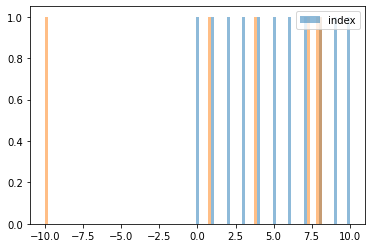

Colunm Name :  id
Column Contents :  [    1     2     3 ... 16321 16322 16323]


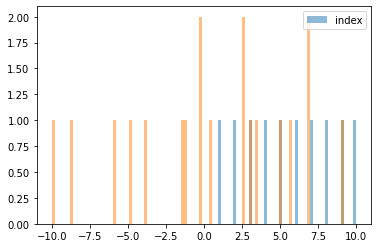

Colunm Name :  eth
Column Contents :  [1 3 3 ... 3 1 1]


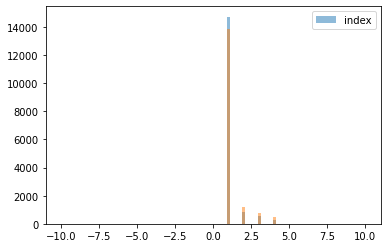

Colunm Name :  age
Column Contents :  [5 6 6 ... 4 4 8]


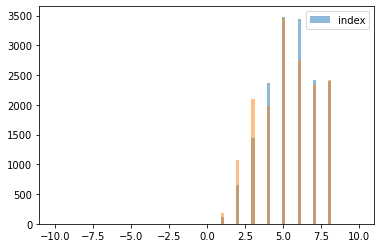

Colunm Name :  sex
Column Contents :  [0. 1. 0. ... 1. 1. 1.]


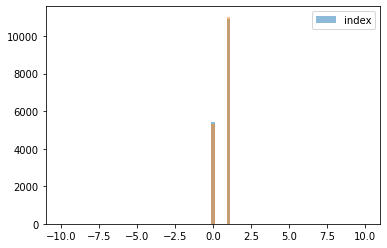

Colunm Name :  scene
Column Contents :  [6 2 1 ... 1 1 1]


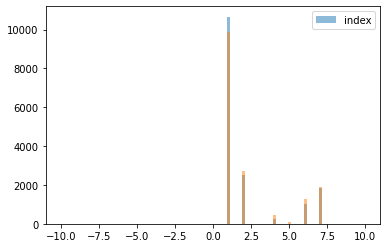

Colunm Name :  event
Column Contents :  ['4A' '2' '2' ... '8' '8' '8']


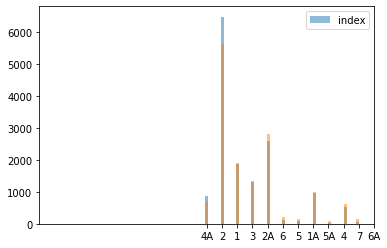

Colunm Name :  AS
Column Contents :  [1 0 0 ... 0 0 0]


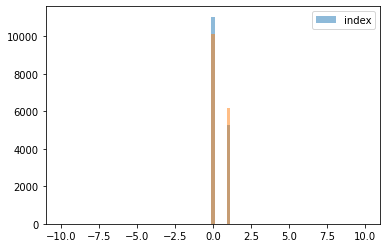

Colunm Name :  itype
Column Contents :  [1. 1. 1. ... 2. 2. 2.]


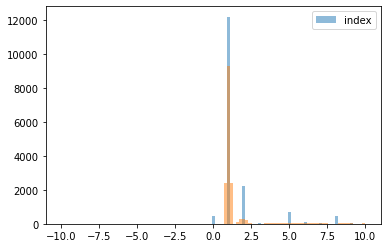

Colunm Name :  ipart
Column Contents :  [4. 2. 2. ... 1. 2. 1.]


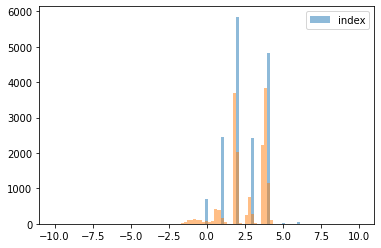

Colunm Name :  casstate
Column Contents :  [2. 2. 2. ... 2. 2. 2.]


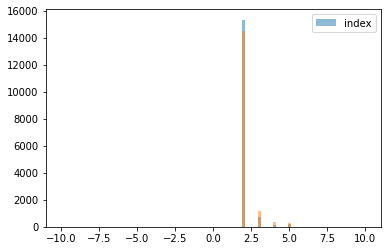

Colunm Name :  mmi
Column Contents :  [0.   6.8  7.4  ... 7.06 8.49 7.15]


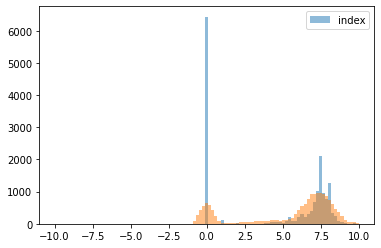

Colunm Name :  cascode
Column Contents :  [ 6 58 49 ...  5  5  5]


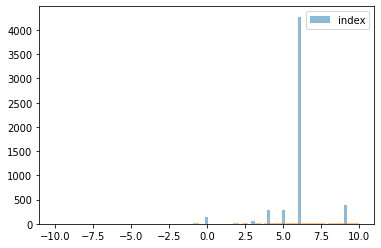

In [98]:
L = []
for (columnName, columnData) in data.iteritems():
    print('Colunm Name : ', columnName)
    print('Column Contents : ', columnData.values)
    bins = np.linspace(-10, 10, 100)
    plt.hist(columnData, bins, alpha=0.5, label=c)
    plt.hist(samples[columnName], bins, alpha=0.5)
    plt.legend(loc='upper right')
    plt.show()

    # y_true = columnData.values
    # y_pred = samples[columnName].values
    # log_loss(y_true, y_pred)

    # print(f'for column {columnName} log loss is {sklearn.metrics.log_loss(y_true, y_pred)}')


In [78]:
for idx_c, c in enumerate(data.columns):
    d = data.loc[c].values
    s = samples.loc[c].values

    print(d,s)
    
    # bins = np.linspace(-10, 10, 100)
    # plt.hist(d, bins, alpha=0.5, label=c)
    # plt.hist(s, bins, alpha=0.5)
    # plt.legend(loc='upper right')
    # plt.show()
    # hist_1, _ = np.histogram(d, bins=100)
    # hist_2, _ = np.histogram(s, bins=100)
    # intersection = return_intersection(hist_1, hist_2)
    # print(f'correlation for {c} is {intersection}')

KeyError: ignored

In [58]:
data.columns

Index(['index', 'id', 'eth', 'age', 'sex', 'scene', 'event', 'AS', 'itype',
       'ipart', 'casstate', 'mmi', 'cascode'],
      dtype='object')

##**save ML model**

In [ ]:
MLpath = outputDir / 'ctganOutput' / f'ctganTabular_{e}epochs.pt'
# torch.save(ctgan, path)
torch.save(ctgan.state_dict(), MLpath)

# and to reload it 
# model = TheModelClass(*args, **kwargs)
# model.load_state_dict(torch.load(PATH))
# model.eval()

##**Generate synthetic data**

In [ ]:
!pip show pandas

In [ ]:
!pip install pandas==1.0.4

In [ ]:
%%time
s = 100000
for v in range(700):
  print(v)
  samples = ctgan.sample(s)
  samples.to_parquet(outputDir / 'ctganOutput' / f'smallSyntheticCTGAN{s}samplesVersion{v}.parquet', engine='pyarrow')

#**Postprocessing and Data validation**

##**importing and output path**



In [ ]:
%%time
# %%capture
!apt update
!apt upgrade
!apt install gdal-bin python-gdal python3-gdal
# Install rtree - Geopandas requirment
!apt install python3-rtree
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes
!pip install memory_profiler

#panda profiling
!pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

#contextily
!pip3 install contextily

In [ ]:
import glob
import os
import pandas as pd
from pandas_profiling import ProfileReport
import dask
import dask.dataframe as dd
from dask.distributed import Client
import memory_profiler
%load_ext memory_profiler
from sys import getsizeof
import matplotlib.pyplot as plt
from textwrap import wrap
from sklearn import preprocessing
import contextily as ctx

%matplotlib inline
plt.style.use('seaborn-whitegrid')

from shapely.geometry import box
import geopandas as gpd

pathCTGANoutput = outputDir / 'ctganOutput'
pathShapefile = '/content/drive/My Drive/Colab Notebooks/01_githubRepo/FFE/data/shapefile'

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


##**definitions**

In [ ]:
@dask.delayed
def read_and_concatenate_parquets(prefix, path=pathCTGANoutput):
  L = []
  files = glob.glob(os.path.join(path, prefix))# output_scenario_0_step_0.parquet
  for file in files:
    print("file loaded : {}".format(file))
    pqt = dd.read_parquet(file)
    L.append(pqt)
  df = dd.concat(L)
  return df


def count_fid_occurences(df):
  count = df['source'].value_counts().compute()
  count_df = pd.DataFrame({'source': count.index, 'count': count.values})
  count_df["count"] = pd.to_numeric(count_df["count"])
  return count_df


def load_shapefile(file_name, minx, miny, maxx, maxy, path=pathShapefile):
    # crop data
    bbox = box(minx, miny, maxx, maxy)
    # building point dataset
    gdf_buildings = gpd.read_file(os.path.join(path,file_name), bbox=bbox)
    max_extent = gdf_buildings.total_bounds
    data_size = getsizeof(gdf_buildings) /(1024.0**3)
    print("Shapefile extent : {}".format(max_extent))
    print("Asset loaded : {}".format(len(gdf_buildings)))
    return gdf_buildings


def merge_coordinates_export_shape(ddf, gdf, name_output, path=pathCTGANoutput):
  gdf = gdf[['TARGET_FID', 'geometry']]
  df = pd.DataFrame(gdf)
  # ddf = ddf.compute()
  df_merge = ddf.merge(df, how='left', left_on='source', right_on='TARGET_FID')
  gdf_merge = gpd.GeoDataFrame(df_merge, geometry='geometry')
  gdf_merge.to_file(os.path.join(path, name_output + ".shp"))
  return gdf_merge

##**outputs concatenation and count**



In [ ]:
%%time
%%memit
ddf = read_and_concatenate_parquets("smallSyntheticCTGAN*")
count_df = count_fid_occurences(ddf)

In [ ]:
# gdfCBD = load_shapefile("buildings_raw.shp", 1748570, 5425500, 1749500, 5427600) # small
# gdfRegion = load_shapefile("buildings_raw.shp", 1740508, 5420049, 1755776, 5443033) # whole

##**validation**



Create plot for CBD


*   Left - CBD, Monte Carlo 7M rows
*   Right - CBD, CTGAN 7M rows from CBD 70000 rows, 85 epochs



In [ ]:
outputDir

PosixPath('/content/drive/My Drive/Colab Notebooks/02_output/ctgan')

###**maps**

In [ ]:
#data
CBD_MonteCarloSim = gpd.read_file(outputDir / 'smallBurnedBuildings.shp') # 2500 simulations
CBD_MonteCarloSim["count"] = pd.to_numeric(CBD_MonteCarloSim["count"])
# CBD_CTGAN = merge_coordinates_export_shape(count_df, gdfCBD, "CBD_SyntheticCTGANmapBurnedBuildings") # only for first pass
CBD_CTGAN = gpd.read_file(pathCTGANoutput / 'CBD_SyntheticCTGANmapBurnedBuildings.shp')
# normalize data
min_max_scaler = preprocessing.MinMaxScaler()
quantile_scaler = preprocessing.QuantileTransformer()
CBD_MonteCarloSim['MinMaxNorm_count'] = min_max_scaler.fit_transform(CBD_MonteCarloSim[['count']].values.astype(float))
CBD_CTGAN['MinMaxNorm_count'] = min_max_scaler.fit_transform(CBD_CTGAN[['count']].values.astype(float))
CBD_MonteCarloSim['quantileNorm_count'] = quantile_scaler.fit_transform(CBD_MonteCarloSim[['count']].values.astype(float))
CBD_CTGAN['quantileNorm_count'] = quantile_scaler.fit_transform(CBD_CTGAN[['count']].values.astype(float))

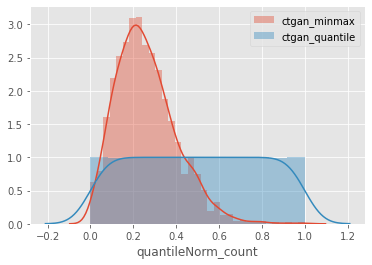

In [ ]:
import seaborn as sns
# sns.distplot(CBD_MonteCarloSim.MinMaxNorm_count, label='mc_minmax', kde=True)
# sns.distplot(CBD_MonteCarloSim.quantileNorm_count, label='mc_quantile', kde=True)
sns.distplot(CBD_CTGAN.MinMaxNorm_count, label='ctgan_minmax', kde=True)
sns.distplot(CBD_CTGAN.quantileNorm_count, label='ctgan_quantile', kde=True)
plt.legend()

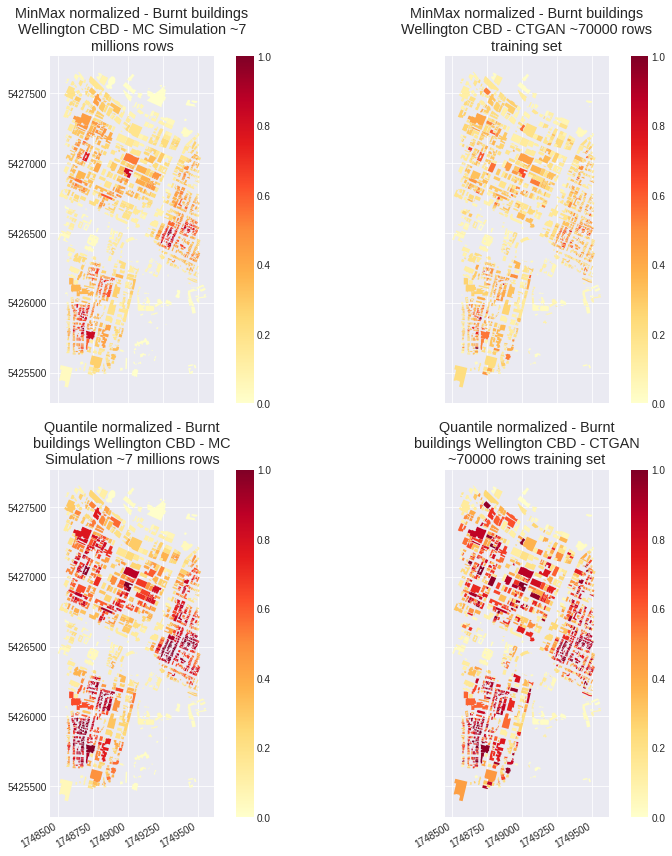

In [ ]:
# data
# if base map is needed:
import contextily as ctx
CBD_MonteCarloSim_mer = CBD_MonteCarloSim.to_crs(epsg=3857)
CBD_CTGAN_mer = CBD_CTGAN.to_crs(epsg=3857)


# plot
plt.style.use('seaborn-darkgrid')
fig, ((ax1, ax2), (ax1b, ax2b)) = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(12, 12))
# ctx.add_basemap(ax) # add base map
CBD_MonteCarloSim.plot(ax=ax1, column='MinMaxNorm_count', cmap='YlOrRd', legend=True)
CBD_CTGAN.plot(ax=ax2, column='MinMaxNorm_count', cmap='YlOrRd', legend=True)
CBD_MonteCarloSim.plot(ax=ax1b, column='quantileNorm_count', cmap='YlOrRd', legend=True)
CBD_CTGAN.plot(ax=ax2b, column='quantileNorm_count', cmap='YlOrRd', legend=True)
ax1.set_title("\n".join(wrap('MinMax normalized - Burnt buildings Wellington CBD - MC Simulation ~7 millions rows', 35)))
ax1.ticklabel_format(useOffset=False, style='plain')
ax2.set_title("\n".join(wrap('MinMax normalized - Burnt buildings Wellington CBD - CTGAN ~70000 rows training set', 35)))
ax2.ticklabel_format(useOffset=False, style='plain')
ax1b.set_title("\n".join(wrap('Quantile normalized - Burnt buildings Wellington CBD - MC Simulation ~7 millions rows', 35)))
ax1b.ticklabel_format(useOffset=False, style='plain')
ax2b.set_title("\n".join(wrap('Quantile normalized - Burnt buildings Wellington CBD - CTGAN ~70000 rows training set', 35)))
ax2b.ticklabel_format(useOffset=False, style='plain')
fig.autofmt_xdate()
plt.tight_layout()
plt.show()
fig.savefig(pathCTGANoutput / 'comparisonCBD_normalized_map.jpg', dpi=300)

In [ ]:
CBD_CTGAN.crs

<Projected CRS: EPSG:2193>
Name: NZGD2000 / New Zealand Transverse Mercator 2000
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: New Zealand - onshore
- bounds: (166.37, -47.33, 178.63, -34.1)
Coordinate Operation:
- name: New Zealand Transverse Mercator 2000
- method: Transverse Mercator
Datum: New Zealand Geodetic Datum 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

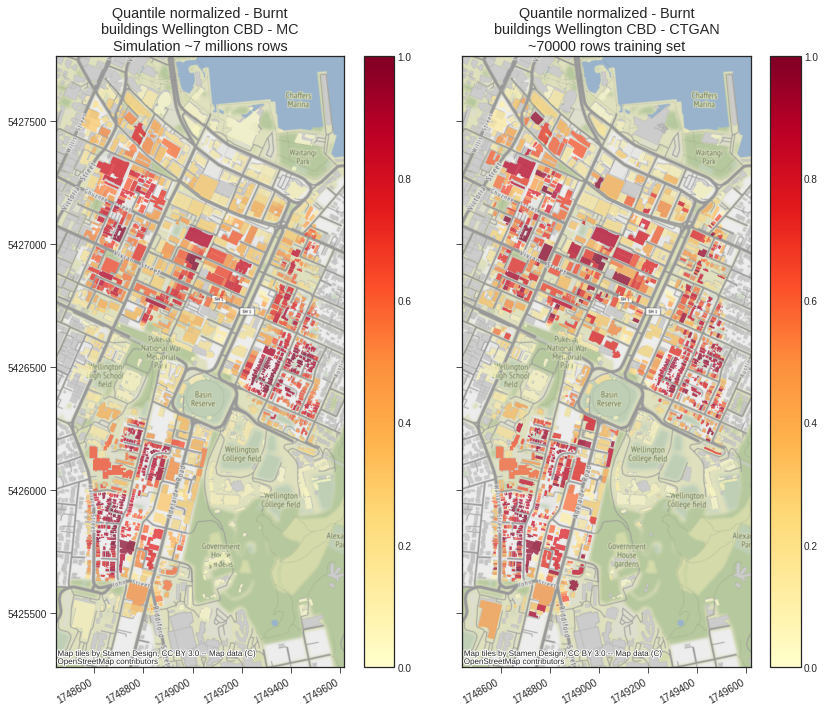

In [ ]:
import contextily as ctx
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.style.use('seaborn-white')
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(12, 10))

p1 = CBD_MonteCarloSim.plot(ax=ax1, column='quantileNorm_count', cmap='YlOrRd', alpha=0.7, legend=True)
ctx.add_basemap(ax1, crs=2193)
p2 = CBD_CTGAN.plot(ax=ax2, column='quantileNorm_count', cmap='YlOrRd', alpha=0.7, legend=True)
ctx.add_basemap(ax2, crs=2193) # add base map
ax1.set_title("\n".join(wrap('Quantile normalized - Burnt buildings Wellington CBD - MC Simulation ~7 millions rows', 35)))
ax1.ticklabel_format(useOffset=False, style='plain')
ax2.set_title("\n".join(wrap('Quantile normalized - Burnt buildings Wellington CBD - CTGAN ~70000 rows training set', 35)))
ax2.ticklabel_format(useOffset=False, style='plain')
ax1.tick_params(direction='out', length=6)
ax2.tick_params(direction="out", length=6)

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

###**plots**

In [ ]:
CBD_MonteCarloSim.columns

Index(['source', 'count', 'TARGET_FID', 'geometry', 'MinMaxNorm_count',
       'quantileNorm_count'],
      dtype='object')

In [ ]:
# prepare data
# CBD_MonteCarloSim_crop = CBD_MonteCarloSim[CBD_MonteCarloSim['source'].isin(CBD_CTGAN['source'])]
CBD_MonteCarloSim.sort_values(by=['source'], inplace=True)
CBD_CTGAN.sort_values(by=['source'], inplace=True)

fig, ax = plt.subplots(figsize=(10, 10))
sns.distplot(CBD_MonteCarloSim['count'], kde=True, label='mc')
sns.distplot(CBD_CTGAN['count'], kde=True, label='ctgan')
plt.legend()
plt.show()
plt.close()

In [ ]:
dfCorrelation

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Pearsons correlation: 0.796
Spearmans correlation: 0.832


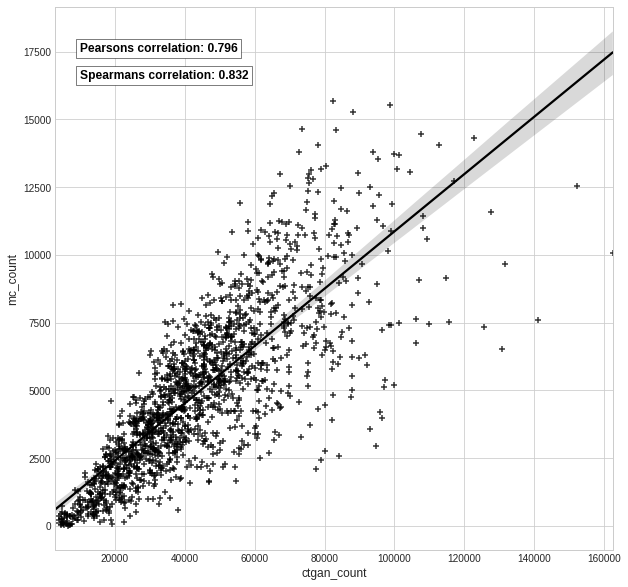

In [ ]:
import seaborn as sns
import scipy.stats as stats

# prepare data
dfCorrelation = CBD_MonteCarloSim[['source', 'count']]
dfCorrelation.rename(columns = {'count':'mc_count'}, inplace = True)
dfCorrelation = pd.merge(dfCorrelation, CBD_CTGAN[['source', 'count']], on='source')
dfCorrelation.rename(columns = {'count':'ctgan_count'}, inplace = True)

# calculate Pearson's correlation
corrp, _ = stats.pearsonr(dfCorrelation.mc_count.values, dfCorrelation.ctgan_count.values)
print('Pearsons correlation: %.3f' % corrp)

# calculate spearman's correlation
corrs, _ = stats.spearmanr(dfCorrelation.mc_count.values, dfCorrelation.ctgan_count.values)
print('Spearmans correlation: %.3f' % corrs)

# prepare plot
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(10, 10))
p1 = sns.regplot(x='ctgan_count',y='mc_count', data=dfCorrelation, fit_reg=True, color='black', marker='+', ax=ax)
p1.text(10000, 17500, 'Pearsons correlation: %.3f' % corrp, horizontalalignment='left', size='large', color='black', weight='semibold', bbox=dict(boxstyle="square", fc="white", ec="black"))
p1.text(10000, 16500, 'Spearmans correlation: %.3f' % corrs, horizontalalignment='left', size='large', color='black', weight='semibold', bbox=dict(boxstyle="square", fc="white", ec="black"))
fig.savefig(pathCTGANoutput / 'comparisonCBD_plot.jpg', dpi=300)
plt.show()

Create plot for Wellington region


*   Left - Wellington region, Monte Carlo 500M rows
*   Right - Wellington region, CTGAN 7M rows from CBD 70000 rows



In [ ]:
# region_MonteCarloSim = gpd.read_file('/content/drive/My Drive/04_Cloud/01_Work/GNS/008_FFE/runs/results/burned_buildings.shp')
# region_MonteCarloSim["count"] = pd.to_numeric(region_MonteCarloSim["count"])
# region_CTGAN = merge_coordinates_export_shape(count_df, gdfRegion, "Regional_SyntheticCTGANmapBurnedBuildings")
# # plot
# fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(14, 8))
# region_MonteCarloSim.plot(ax=ax1, column='count', cmap='seismic', legend=True, )
# region_CTGAN.plot(ax=ax2, column='count', cmap='seismic', legend=True)
# ax1.set_title(' Burnt building Wellington Region - MC Simulation ~530 millions rows')
# ax1.ticklabel_format(useOffset=False, style='plain')
# ax2.set_title(' Burnt building Wellington Region - CTGAN ~70000 rows training set')
# ax2.ticklabel_format(useOffset=False, style='plain')
# plt.tight_layout()
# fig.savefig(pathCTGANoutput / 'comparisonRegion.jpg', dpi=300)